In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

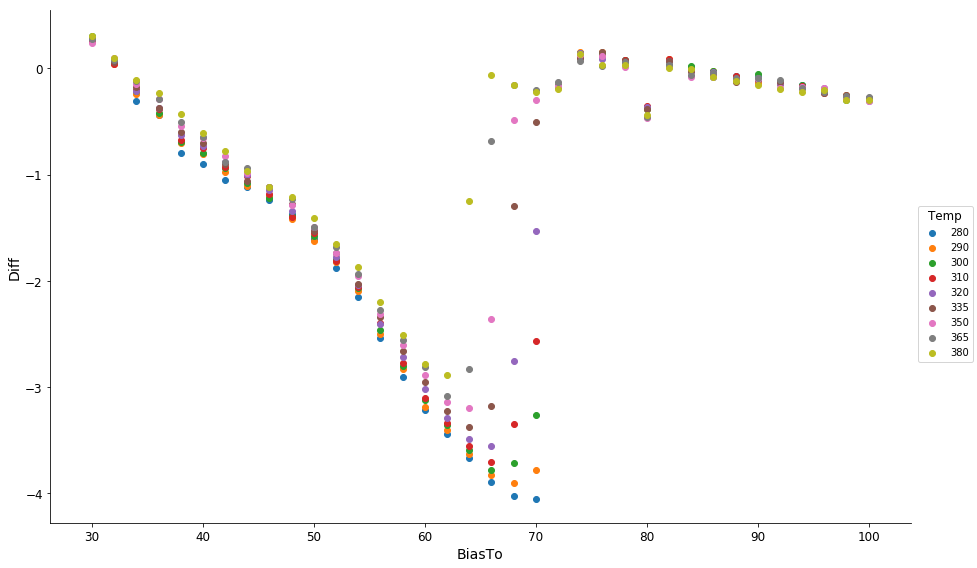

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/fifth_2/force_0.02_rg_0.1_lipid_1.0_mem_1_go_0.8_biask_0.5/rerun_1_29_Apr_193902.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

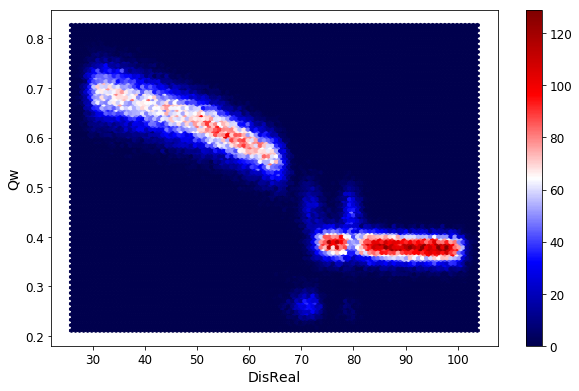

In [3]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

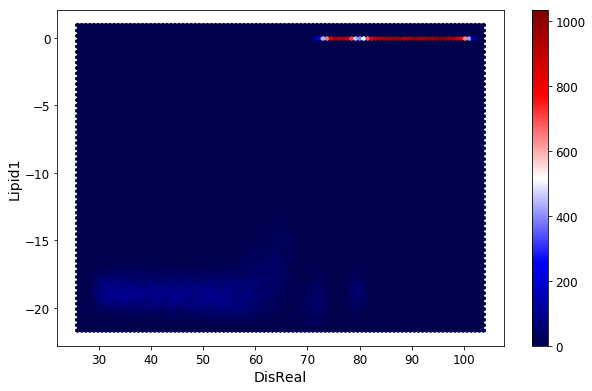

In [10]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Lipid1", cmap="seismic", sharex=False)

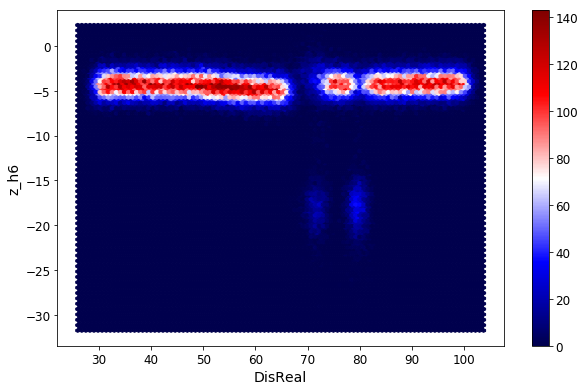

In [5]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

In [8]:
rerun1.query("Temp == 300 and z_h6 > -10").groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 300")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
100.0  0    305.0  99.699533  1.182848  96.228146  98.911035  99.731889   
       11   354.0  99.807613  1.365881  96.096134  98.784685  99.908731   
30.0   3    344.0  30.314299  1.122194  26.995739  29.535524  30.348229   
       5    328.0  30.350844  1.228046  25.951048  29.494394  30.367534   
32.0   11   324.0  32.074892  1.333118  27.943034  31.278613  32.117816   
34.0   2    310.0  33.819303  1.245137  30.003292  32.955652  33.864579   
       9    338.0  33.886355  1.112079  30.777261  33.236969  33.946652   
       10   320.0  33.683231  1.252458  30.559919  32.776952  33.681134   
36.0   5    341.0  35.586270  1.193849  32.102241  34.879920  35.625643   
38.0   1    325.0  37.439630  1.310174  33.782283  36.604654  37.452581   
       8    328.0  37.370213  1.229413  33.639161  36.538885  37.463934   
40.0   4    308.0  39.228865  1.296813  35.670219  38.379476  39.258007   
42.0   1    305.0  40.968523  1.321294  37.504592  40.044241  40.902196   
       4    308.0  41.168467  1.296257  38.008755  40.371224  41.163919   
       5    319.0  41.050688  1.280713  36.678465  40.150063  41.011664   
44.0   2    322.0  42.882100  1.278265  39.510999  42.010153  42.854153   
       10   321.0  42.899690  1.252265  39.312675  41.997098  42.957289   
46.0   7    330.0  44.882988  1.205783  41.237666  43.951879  44.893334   
       9    334.0  44.709980  1.187743  41.927286  43.891786  44.715993   
48.0   0    318.0  46.602584  1.168037  43.226501  45.855700  46.493988   
50.0   8    330.0  48.415600  1.228923  45.238644  47.540966  48.457584   
       9    336.0  48.431641  1.236634  43.972174  47.536844  48.375549   
52.0   8    309.0  50.125787  1.247946  46.091539  49.348452  50.091391   
       9    326.0  50.136975  1.186557  46.664311  49.344085  50.243842   
54.0   11   320.0  51.916353  1.135781  49.123745  51.196730  51.909534   
58.0   3    310.0  55.236197  1.183121  51.559789  54.358901  55.233605   
60.0   2    320.0  56.813636  1.156497  52.996726  56.012602  56.833541   
62.0   0    324.0  58.579035  1.167392  55.445585  57.794225  58.640642   
       6    306.0  58.691638  1.110857  55.997172  57.932569  58.648410   
       11   362.0  58.653661  1.154263  55.618569  57.858837  58.601794   
...           ...        ...       ...        ...        ...        ...   
66.0   0    348.0  62.134121  1.223225  58.914065  61.282520  62.095157   
       4    376.0  62.188015  1.216972  58.738772  61.399154  62.289046   
       5    329.0  62.180310  1.226351  58.942983  61.345562  62.125994   
       6    418.0  62.257096  1.207501  59.335145  61.372829  62.241455   
       7    365.0  62.228989  1.168005  58.767244  61.422594  62.170317   
       9    362.0  62.077292  1.169955  57.999556  61.280245  62.112824   
68.0   2    537.0  64.024498  1.117231  60.397825  63.322450  64.058122   
       5    430.0  64.047113  1.184518  60.962990  63.235281  63.985597   
       6    487.0  64.201000  1.210677  60.642213  63.445280  64.172860   
       7    430.0  64.007563  1.143437  60.358810  63.266695  63.961741   
       8    468.0  64.066493  1.209036  60.463184  63.293487  64.098847   
70.0   0    502.0  65.862128  1.205762  62.519189  65.024794  65.813839   
       1    412.0  65.971354  1.295903  62.582139  65.101717  65.906038   
       6    474.0  65.860209  1.126359  62.594046  65.142406  65.820472   
       8    574.0  65.773049  1.215792  61.853233  64.959723  65.739841   
76.0   3    370.0  76.144740  1.346413  71.523499  75.218474  76.119967   
       4    307.0  76.115006  1.396200  71.859664  75.226982  76.160708   
       7    313.0  76.052802  1.344142  71.635394  75.093187  76.034324   
78.0   11   344.0  78.015980  1.302000  74.862068  77.188412  78.037859   
82.0   0    304.0  81.912567  1.325725  78.658724  81.007391  81.969092   
       11   312.0  82.049713  1.33068

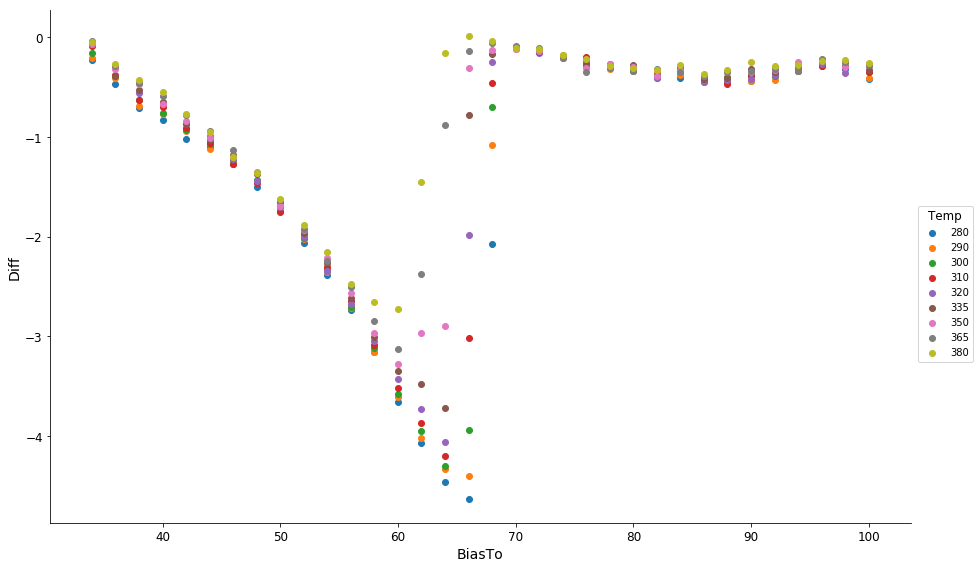

In [11]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/fifth_2/force_0.02_rg_0.1_lipid_1.0_mem_1_go_0.8_biask_0.5_enhance/rerun_1_30_Apr_150140.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

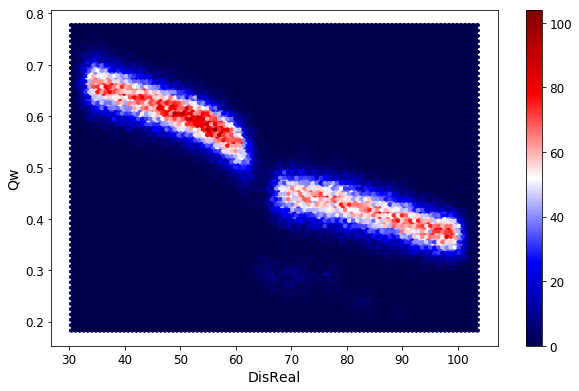

In [53]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

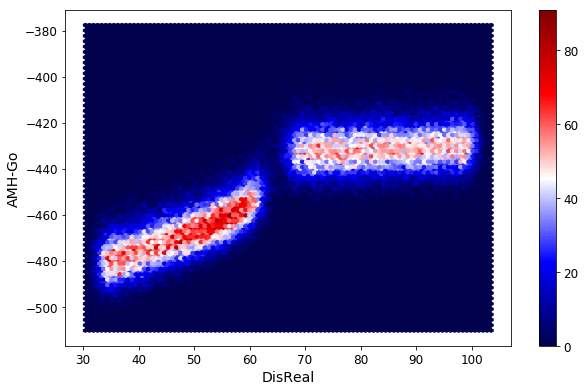

In [54]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "AMH-Go", cmap="seismic", sharex=False)

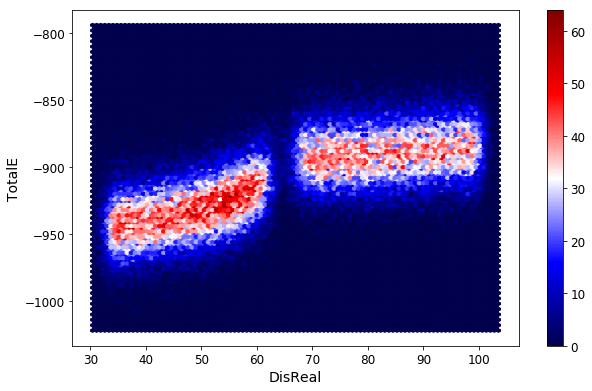

In [55]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

In [62]:
rerun1.query("Temp == 300 and DisReal > 60")["Lipid4"].min()

-3.30789367707193

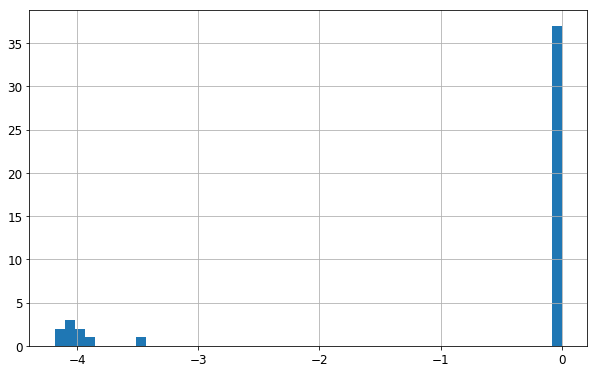

In [75]:
rerun1.query("Temp == 300 and Lipid4 < 0")["Lipid13"].hist(bins=50)

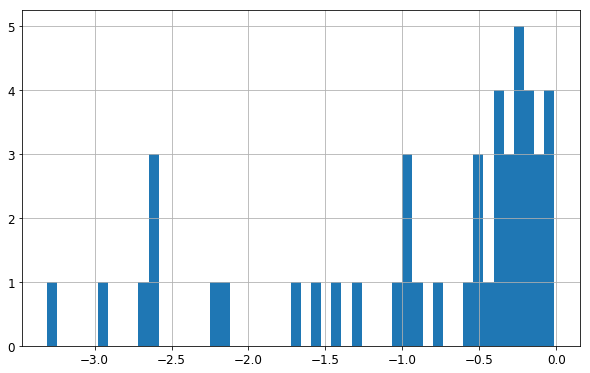

In [64]:
rerun1.query("Temp == 300 and Lipid4 < 0")["Lipid4"].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b58d898>]], dtype=object)

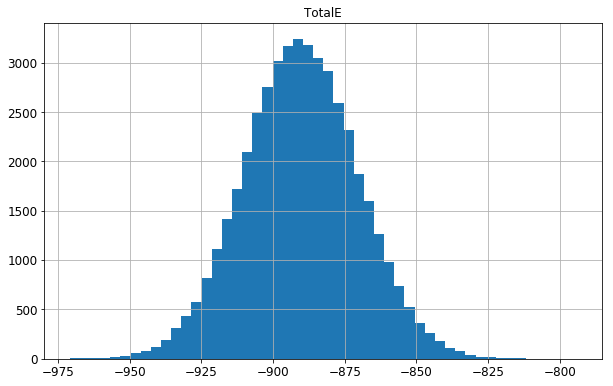

In [60]:
rerun1.query("Temp == 300 and DisReal > 60").hist("TotalE",bins=50)

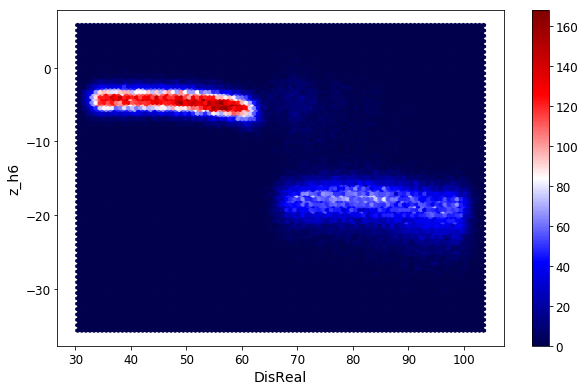

In [13]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

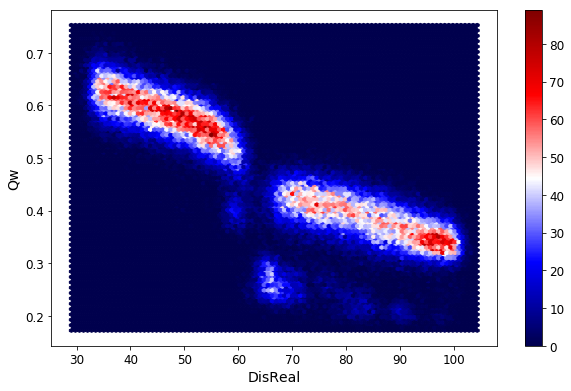

In [40]:
rerun1.query("Temp == 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

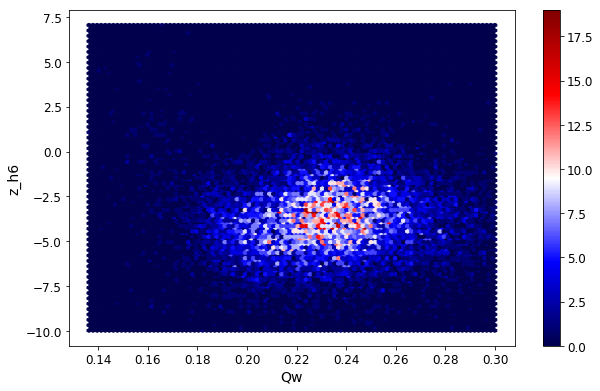

In [37]:
rerun1.query("Temp == 380 and Qw < 0.3 and z_h6 > -10").plot.hexbin("Qw", "z_h6", cmap="seismic", sharex=False)

In [38]:
t = rerun1.query("Temp == 380 and Qw < 0.3 and z_h6 > -10")
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
60.0   6    116.0  60.643955  1.446694  56.747410  59.534067  60.848185   
       8    154.0  60.388496  1.360507  56.988080  59.571451  60.334722   
62.0   8    278.0  62.302338  1.467088  58.589756  61.264496  62.386321   
       10   326.0  62.189518  1.340104  56.876473  61.304165  62.171938   
64.0   1    223.0  64.228448  1.369998  61.128511  63.334094  64.212539   
       4    441.0  64.104976  1.417446  59.434060  63.146290  64.000082   
       6    282.0  64.433464  1.491446  60.003349  63.367507  64.425783   
       10   547.0  64.402938  1.425785  60.331011  63.490832  64.390192   
66.0   1    134.0  66.293052  1.379458  62.514822  65.235326  66.303985   
       3    272.0  65.605718  1.337174  61.739275  64.833966  65.587955   
       4    488.0  66.328089  1.413657  61.974736  65.438485  66.388820   
       8    172.0  65.592725  1.328836  61.857546  64.763662  65.677894   
       9    480.0  66.007394  1.580529  60.972359  64.926616  66.038725   
       10   296.0  66.155867  1.437043  61.737723  65.235841  66.207468   
       11   331.0  66.248720  1.296273  61.110400  65.387312  66.259226   
68.0   3    288.0  68.183627  1.373385  64.056513  67.329012  68.140040   
       10   426.0  68.085070  1.407795  63.643459  67.064515  68.080357   
       11   305.0  68.004391  1.373150  63.627385  67.095708  68.004234   
70.0   7    197.0  69.721355  1.359146  66.314193  68.756336  69.580484   
       8    338.0  69.916840  1.415914  65.713817  68.952834  69.941731   
       9    286.0  69.902900  1.397477  66.047995  68.894784  69.968917   
       11   271.0  70.016293  1.347308  66.754335  69.151855  70.022781   
72.0   0    271.0  72.027642  1.431082  66.936883  71.158040  72.017075   
       1    151.0  71.930998  1.371406  67.348224  71.142137  71.903674   
       2    556.0  71.820791  1.418807  67.458244  70.831212  71.843111   
76.0   3    346.0  75.743204  1.357097  71.219205  74.862230  75.682083   
78.0   0    211.0  77.572900  1.330285  74.412900  76.813721  77.575628   
       11   305.0  77.905296  1.402996  74.273697  76.911507  77.805647   
80.0   6    341.0  79.633885  1.432487  75.912977  78.693930  79.682296   
82.0   0    199.0  81.712886  1.413834  77.732616  80.625056  81.713324   
       4    419.0  81.667646  1.404606  77.734237  80.799618  81.743395   
       11   314.0  81.603267  1.448089  77.392535  80.668351  81.537987   
84.0   0    138.0  83.807975  1.365165  80.322418  82.962654  83.701981   
       3    469.0  83.804268  1.481138  80.011955  82.840476  83.795001   
88.0   7    170.0  87.567636  1.565901  83.984887  86.419525  87.424829   
90.0   1    147.0  89.401101  1.402853  85.335792  88.601062  89.336099   
       10   556.0  89.838160  1.403557  85.666984  88.963509  89.882519   
92.0   10   148.0  91.569676  1.431246  87.655869  90.754352  91.614623   
98.0   4    160.0  97.439120  1.485603  93.119022  96.541773  97.472737   

                  75%         max  
BiasTo Run                         
60.0   6    61.548234   64.511868  
       8    61.197585   63.934662  
62.0   8    63.276305   66.565176  
       10   63.082094   65.761575  
64.0   1    65.069352   67.969850  
       4    65.001156   67.977873  
       6    65.466862   68.512491  
       10   65.408895   68.251498  
66.0   1    67.391703   69.416886  
       3    66.448501   69.540769  
       4    67.264703   70.785214  
       8    66.487480   68.277247  
       9    67.097443   71.101098  
       10   67.198561   69.680059  
       11   67.142795   69.641148  
68.0   3    69.123926   71.789757  
       10   69.080123   72.727994  
       11   68.935990   72.793886  
70.0   7    70.712277   73.202534  
       8    70.919702   73.990448  
       9    70.915456   73.252280  
       11   70.920286   74.528132  
72.0   0    72.943620   76.145625  
       1    72.810174   77.410165  


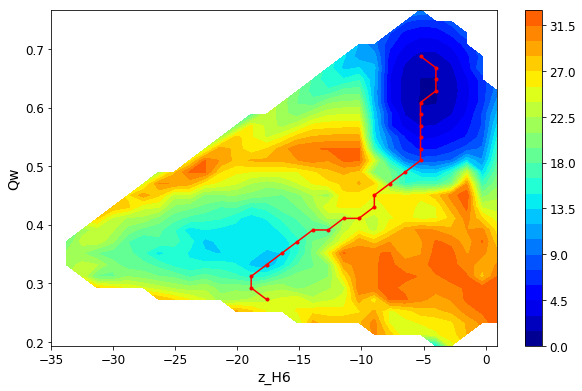

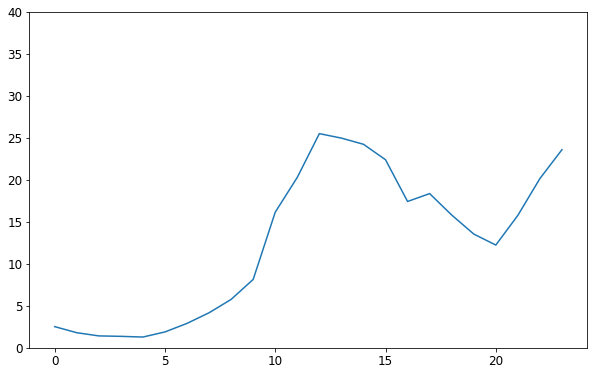

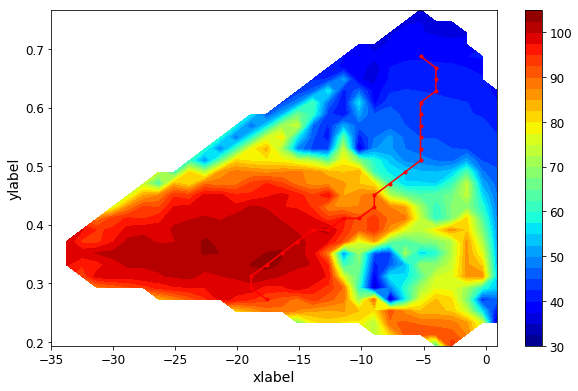

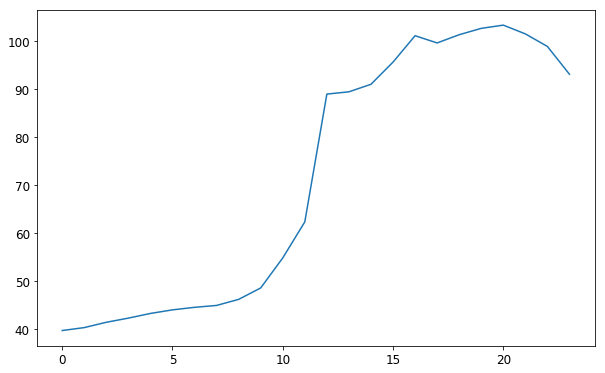

In [52]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 300
location = pre + "/third/_280-350/2d_z_qw/quick_force_0.5/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=40)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

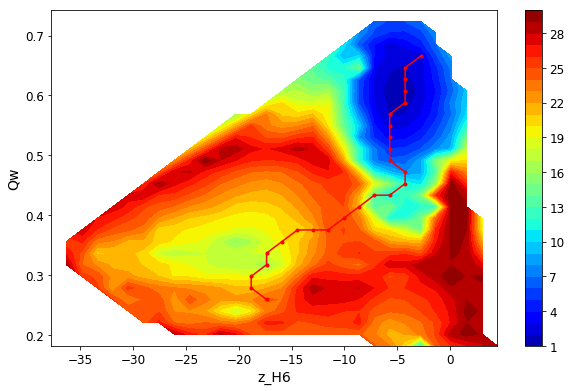

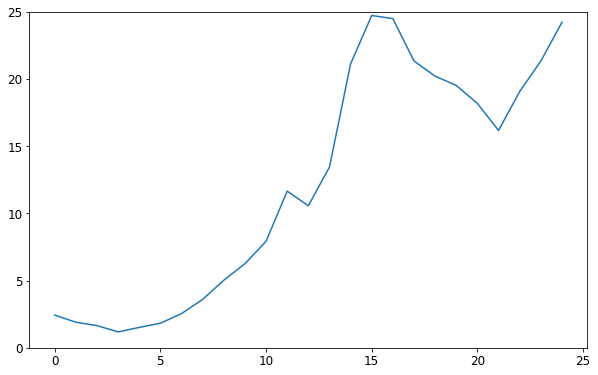

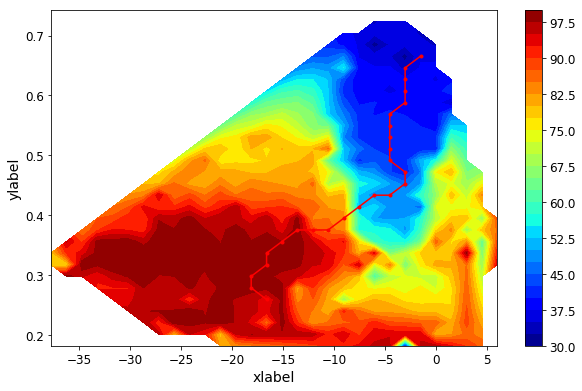

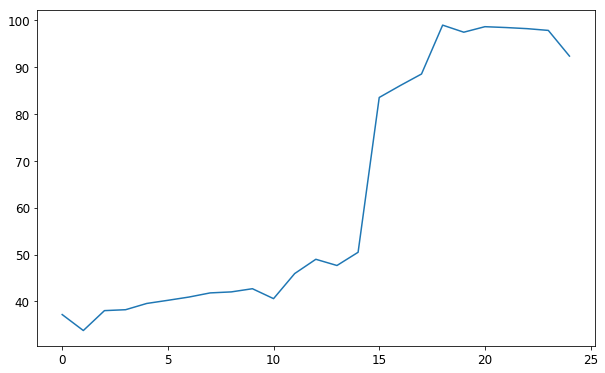

In [44]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/third/_280-350/2d_z_qw/quick_temp350_force_0.3/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

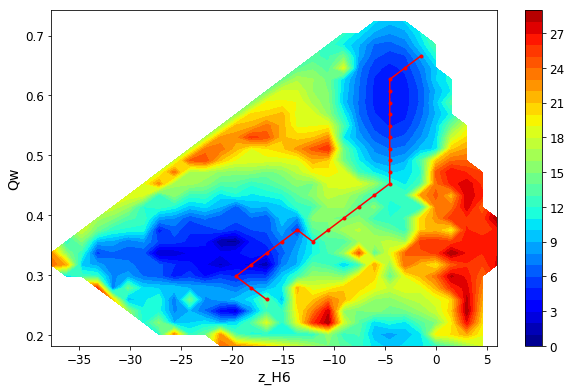

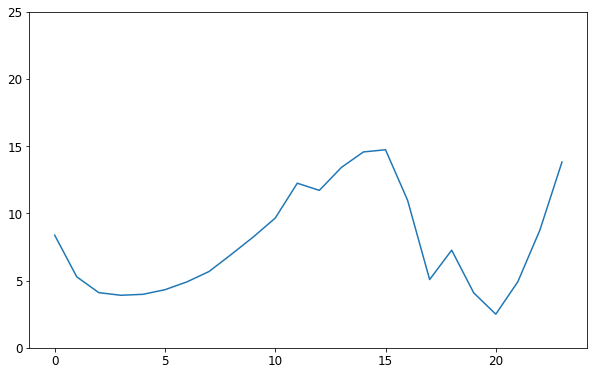

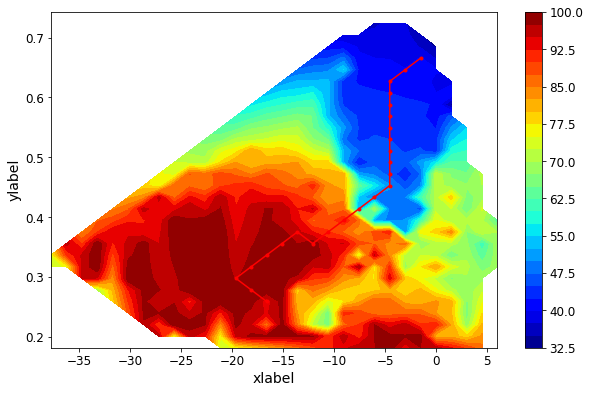

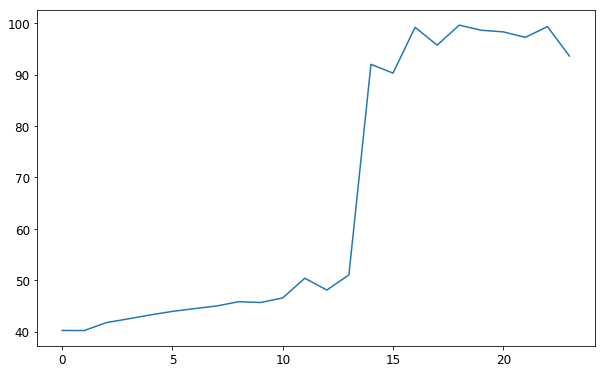

In [43]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/third/_280-350/2d_z_qw/quick_temp350_force_0.5/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

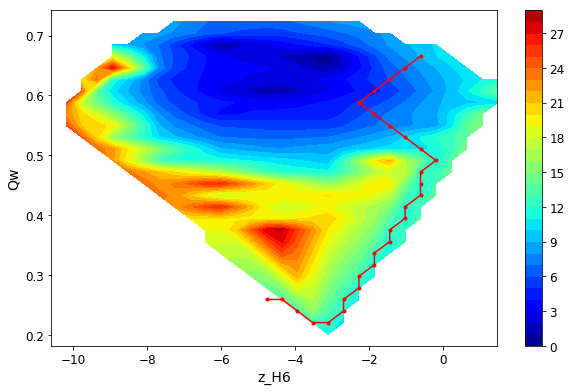

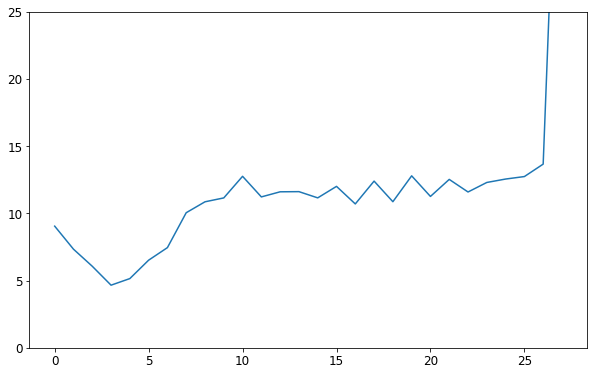

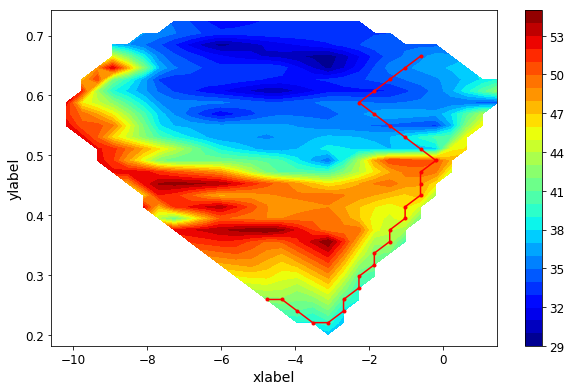

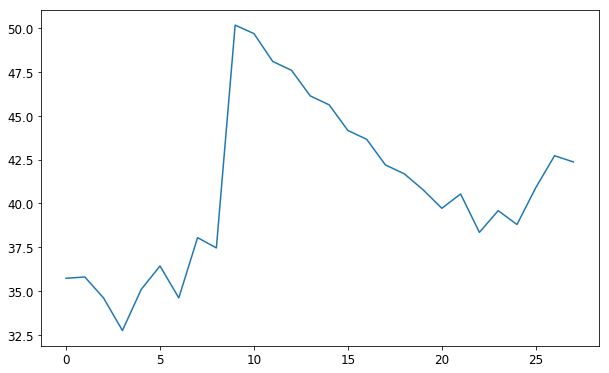

In [42]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 350
location = pre + "/third/_280-350/2d_z_qw/quick_temp350/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

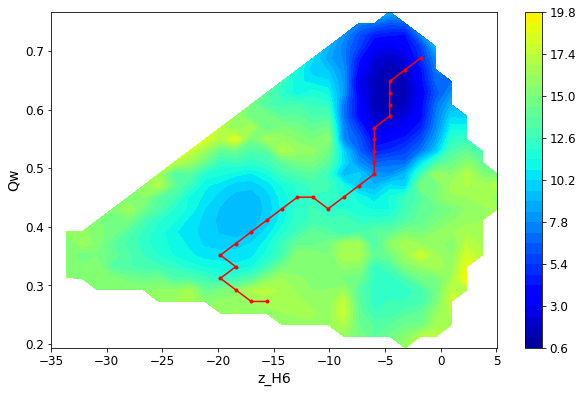

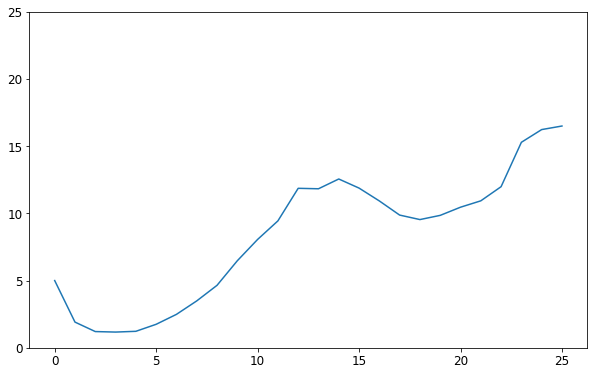

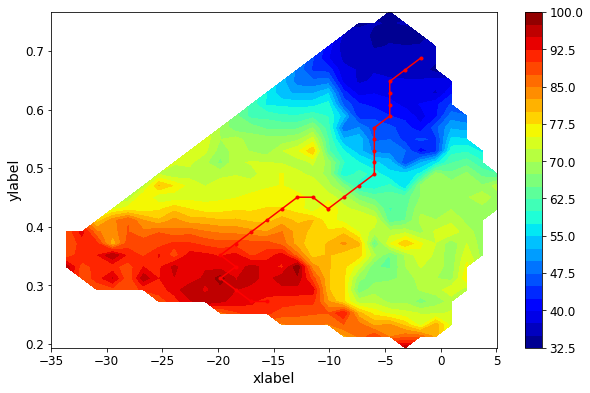

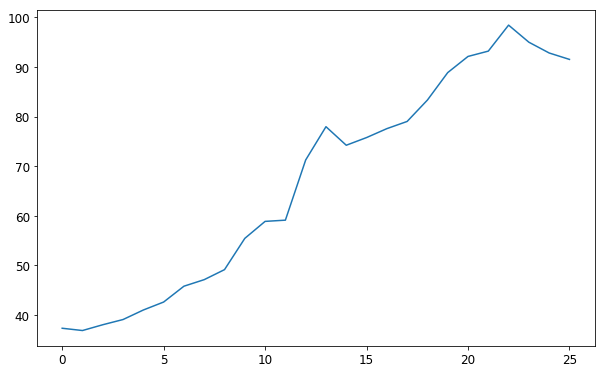

In [23]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 310
location = pre + "/third/_280-350/2d_z_qw/quick_k_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

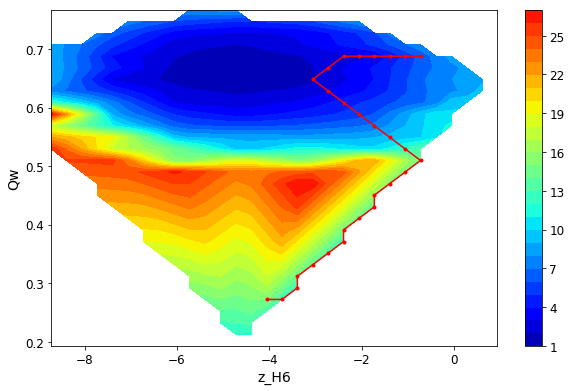

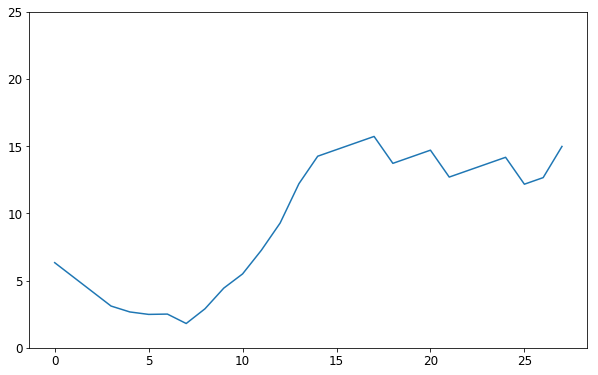

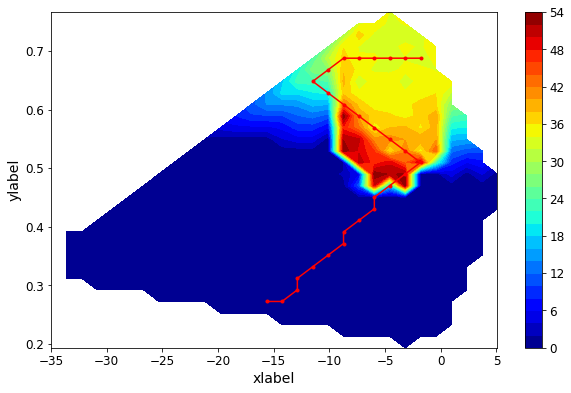

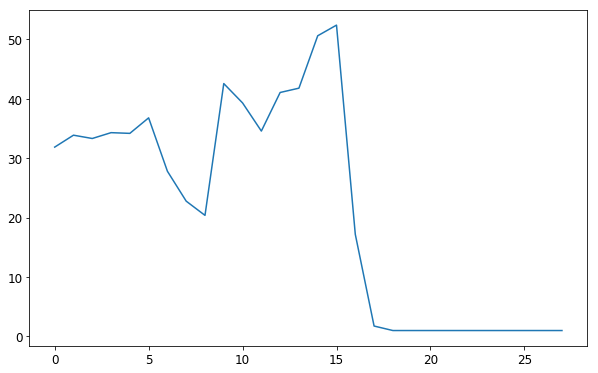

In [18]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 290
location = pre + "/third/_280-350/2d_z_qw/quick_force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

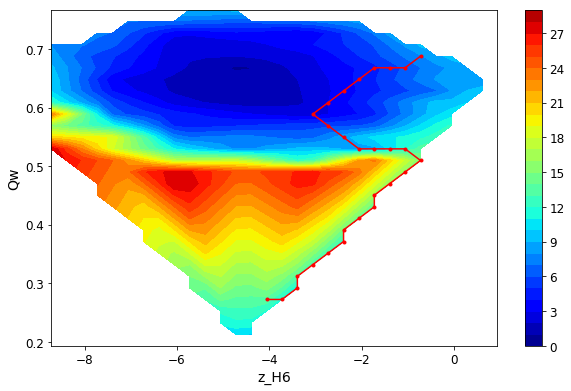

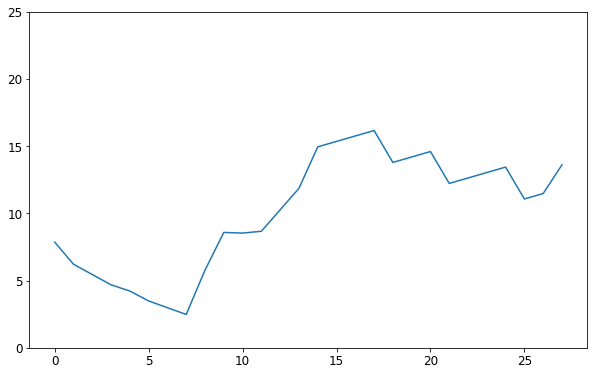

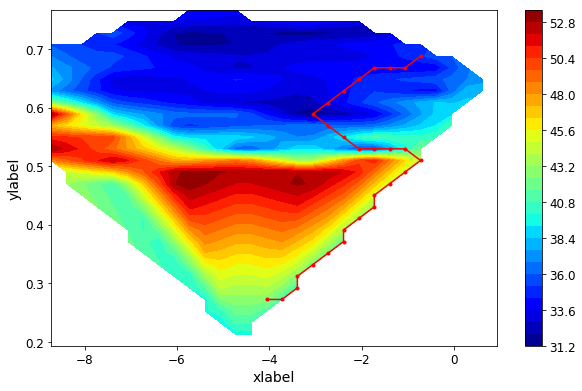

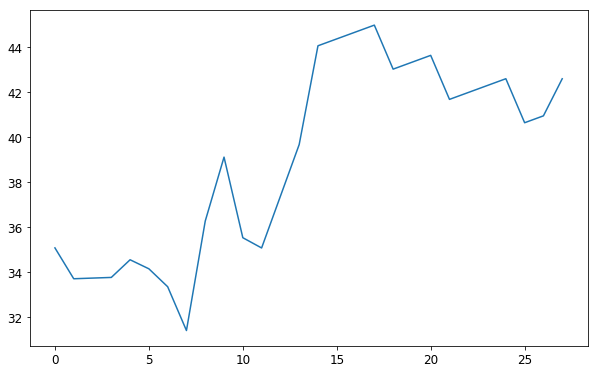

In [16]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 310
location = pre + "/third/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [ ]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 340
location = pre + "/third_expectedEnergy/_280-350/2d_z_qw/temp_340/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(28,22), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmin=-1, zmax=-300)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)